       Labels  __de_saturacao_da_transferrina  \
6514        7                             0.0   
6515        7                             0.0   
6516        7                             0.0   
6517        7                             0.0   
6518        7                             0.0   
...       ...                             ...   
10206       5                             0.0   
10209       5                             0.0   
10210       5                             0.0   
10211       5                             0.0   
10212       5                             0.0   

       ac__anti_t_cruzi__doen_a_de_chagas_  \
6514                                   0.0   
6515                                   0.0   
6516                                   0.0   
6517                                   0.0   
6518                                   0.0   
...                                    ...   
10206                                  0.0   
10209                                  0.0 

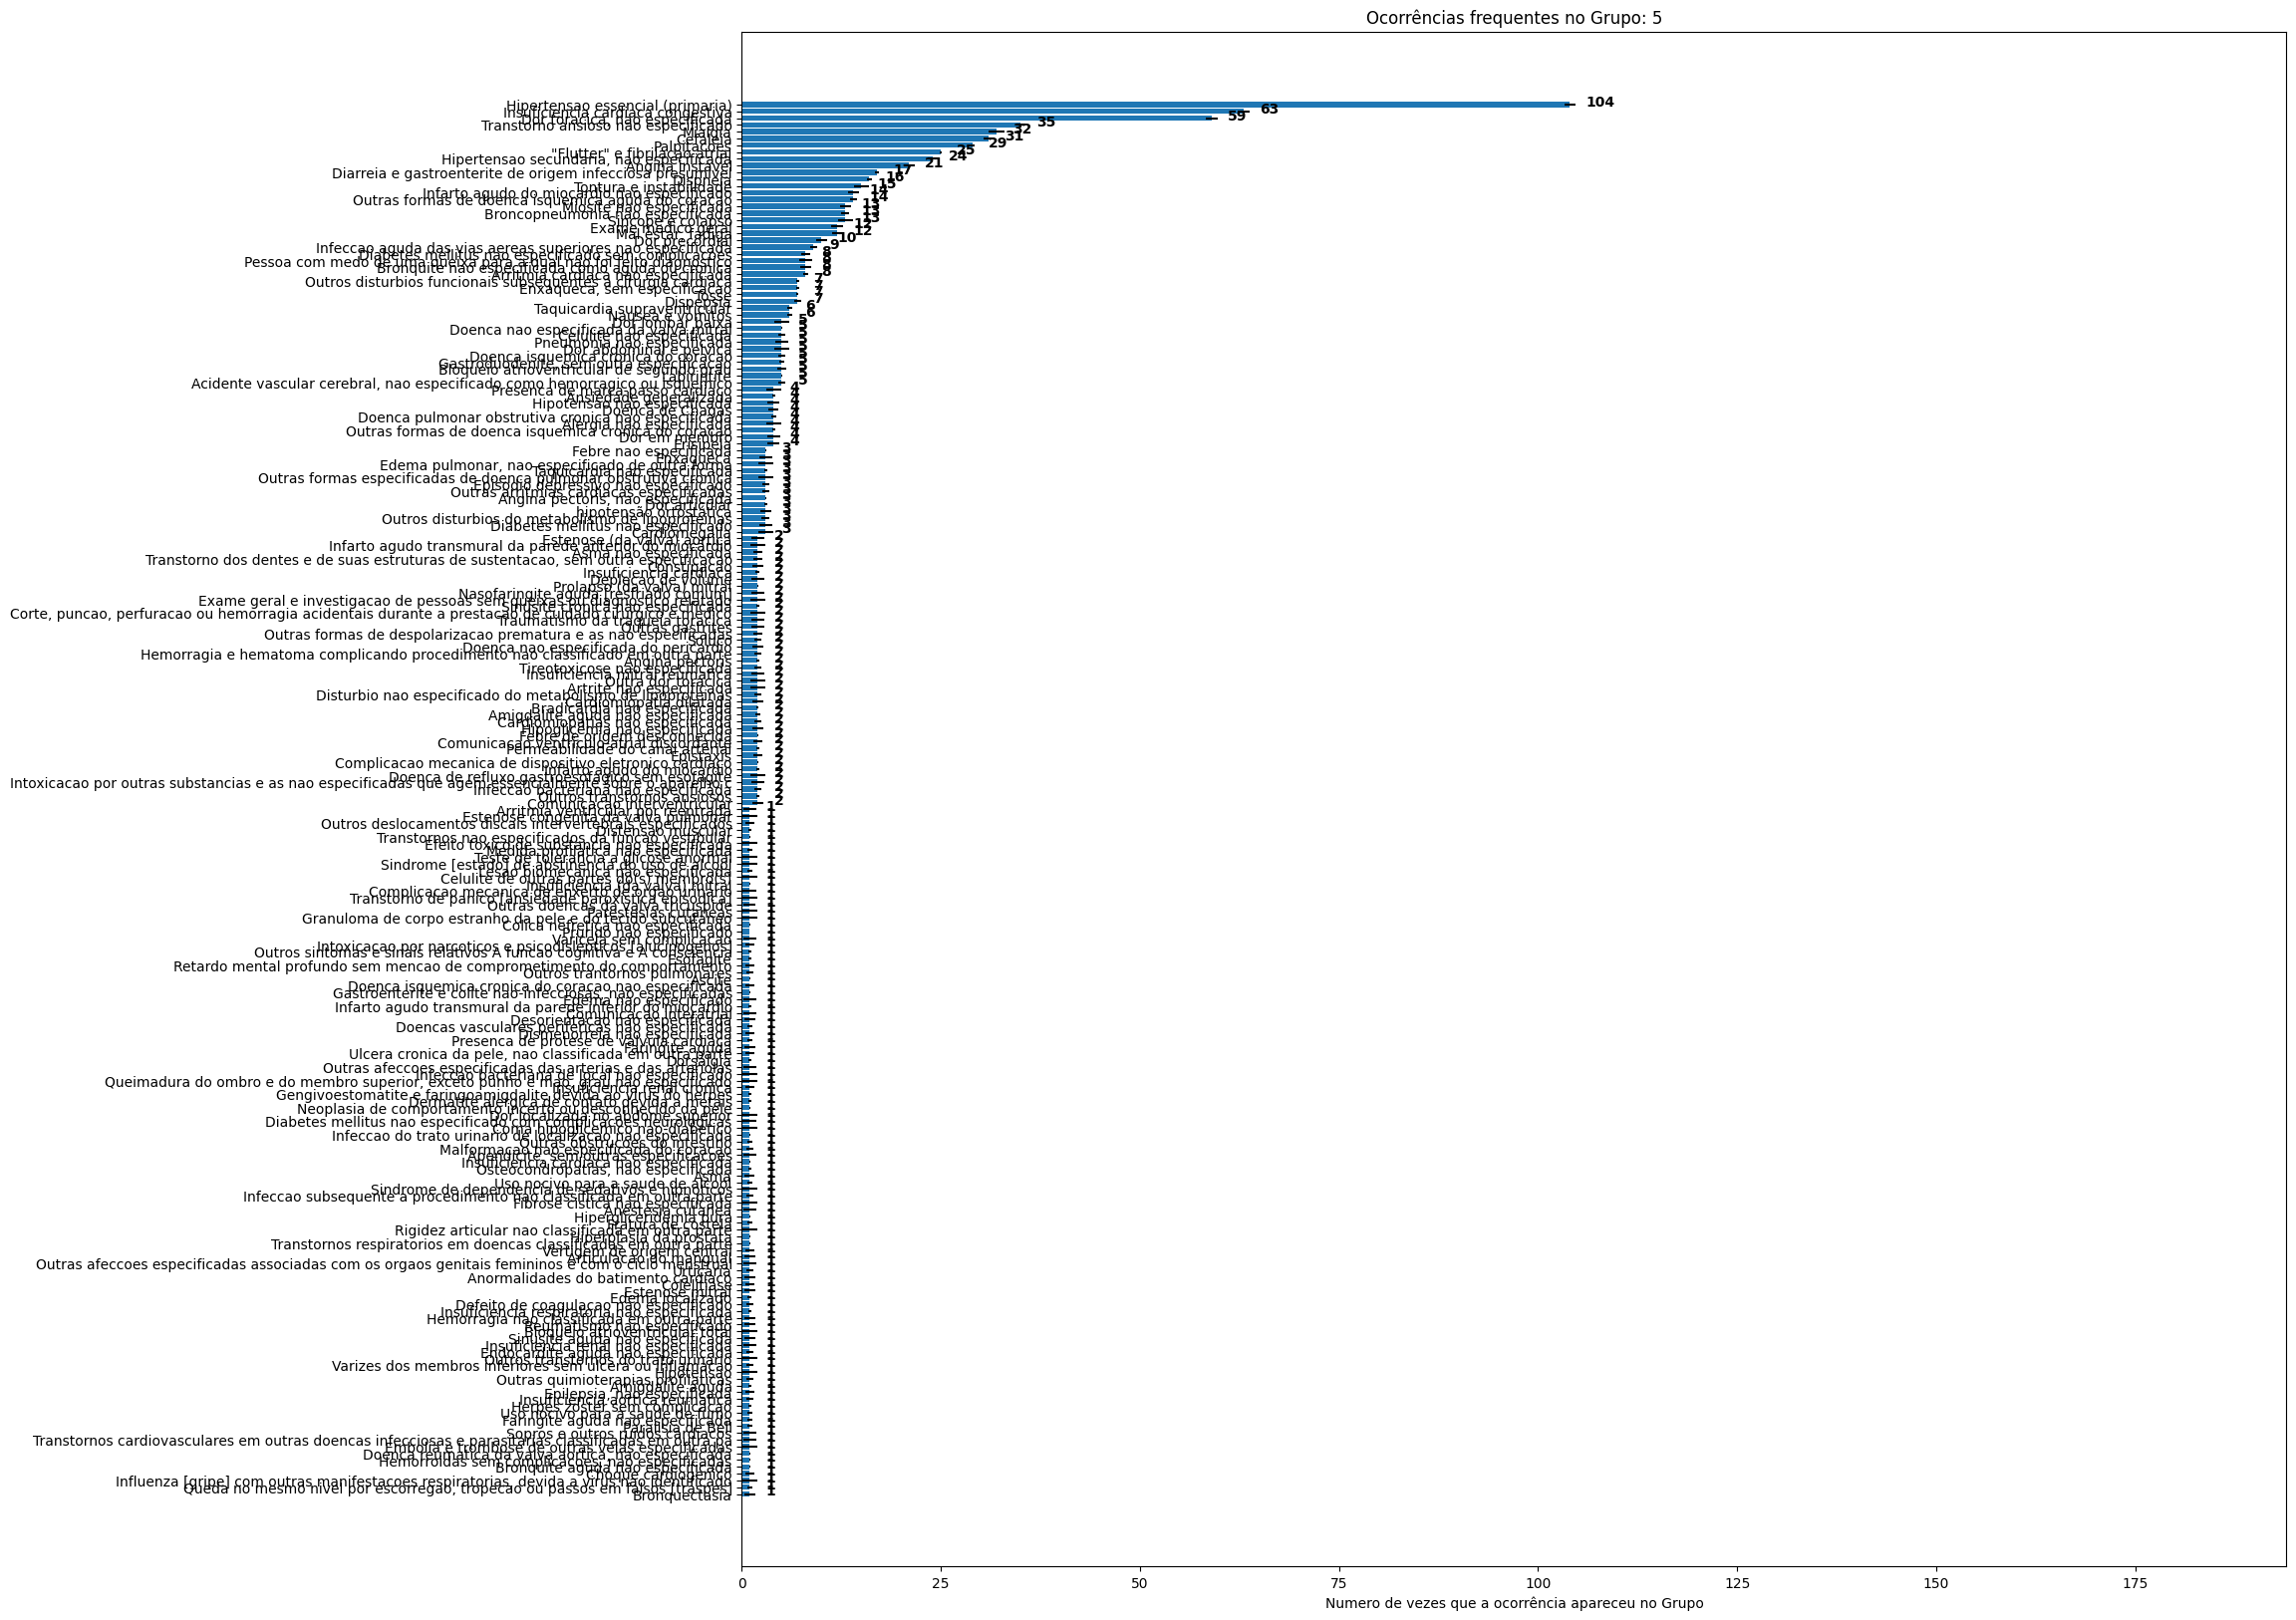

In [1]:
# -*- coding: utf-8 -*-
"""pre-proc.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1780oLMY8310hjNGZIoXVczwd8uC1AwYt
"""

import pandas as pd
import sys 
from pylab import *
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import random
import dataframe_image as dfi
from PIL import Image
import os
import six
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

lista_de_cor =['mediumslateblue',
 'peachpuff',
 'orangered',
 'cyan',
 'deeppink',
 'coral',
 'olivedrab',
 'moccasin',
 'lightgray',
 'greenyellow',
 'rebeccapurple',
 'navajowhite',
 'gainsboro',
 'aliceblue',
 'olive',
 'yellowgreen',
 'darkolivegreen',
 'silver',
 'palevioletred',
 'lightgrey',
 'palegreen',
 'sandybrown',
 'darkblue',
 'honeydew',
 'lightseagreen',
 'lightyellow',
 'moccasin',
 'mediumseagreen',
 'lightseagreen',
 'papayawhip',
 'blanchedalmond',
 'ghostwhite',
 'orangered',
 'indianred',
 'gainsboro',
 'seagreen',
 'gray',
 'darkturquoise',
 'darkgrey',
 'lavenderblush',
 'paleturquoise',
 'khaki',
 'lime',
 'darkslategray',
 'linen',
 'yellowgreen',
 'darkgoldenrod',
 'darkkhaki',
 'sienna',
 'green']

#Reading file provide SQL
def read_csv(name_df,path):
    name_df = pd.read_csv(path+".csv")
    return name_df

df_intial = read_csv('df', 'df5')

df = df_intial.copy()
df_oco = df_intial.copy()



df =df.drop_duplicates()


df = df.drop(columns =['ID','Nome_Ocorrencia'])

df.columns

df.Labels.mode()

df['Labels'].value_counts()

#-df


df_new = df.query('Labels == 5 or Labels== 7')
print(df_new)

nunique = df_new.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_new=df_new.drop(cols_to_drop, axis=1)
df_new

#-df_new

df_new =df_new.reset_index()

#-df_new

df_new = df_new.drop(columns =['index'])

#-df_new

df_new = df_new.rename(columns = {'Labels': 'target'}, inplace = False)
print(df_new)

labels = df_new['target'].to_numpy()



df_new_wot = df_new
name_att = list(df_new_wot.columns)
qnt_d_att = int(len(name_att))
#-len(name_att)
class_name = df_new_wot.target.unique()
print(class_name)

df_new_wot = df_new_wot.drop(columns =['target'])

data =df_new_wot.to_numpy()

name_att = list(df_new_wot.columns)




#class_name = ['45','332']

# OS LABELS do Grupo 5 foram trocados pelo 0 
# OS LABLES do Grupo 7 foraam trocados pelo 1

#----G- 5      960   elementos nos grupo
#----G-7      480   elementos nos grupo

#for i in range(len(labels)):
    #if labels[i] == 45:
        #labels[i] = 0
    #if labels[i] == 332:
        #labels[i] =1

#-print(labels)

#-labels.shape

import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import random

train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data, labels, train_size=0.7)



rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train, labels_train)

train.shape

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=name_att, class_names=class_name, discretize_continuous=True)

"""## rf.fit(train, labels_train)"""

sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

rf.predict(test) == labels_test



#-labels_test

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=name_att, class_names=class_name, discretize_continuous=True)

exp = explainer.explain_instance(test[1], rf.predict_proba, num_features=543, top_labels=1)
#exp.show_in_notebook(show_table=True, show_all=False)

print(test)



def personalize_color_pie(names_columns):
    import matplotlib
    list_color = []
    for name, hex in matplotlib.colors.cnames.items():
        #print(name, hex)
        list_color.append(name)

    col = random.sample(list_color, len(names_columns))
    dic_col = dict(zip(names_columns,col))
    
    return dic_col

def get_values_lime(names_attributes,num_att):
    from datetime import datetime


    var_names = names_attributes
    features_id = names_attributes
    features_id.insert(0,"target")
    df = pd.DataFrame(columns=features_id)
    
    size_test = int(len(test))
    #print(len(test))
    #size_feature = int(len(names_attributes)) +2
    #size_feature = 321
    size_feature = num_att
    #print(size_feature)
    #size_test
    
    for i in range(0,size_test):
        linha = i
        exp = explainer.explain_instance(test[i], rf.predict_proba, num_features=num_att, top_labels=1)
        #exp.show_in_notebook(show_table=True, show_all=False)
        
        lista_a =exp.available_labels()
        data_e_hora_atuais = datetime.now()
        data_e_hora_em_texto = data_e_hora_atuais.strftime("%d/%m/%Y %H:%M")
        print("LINHA NUMERO", i, " de ", size_test,data_e_hora_em_texto)
       
        num_pos_tar= int (exp.available_labels()[0])
        target = lista_a[0]
        target_name = class_name[num_pos_tar]
        #print("TARGET*&&&&&&&&&&&&&&&&",target_name)
        
    
        for feat_num in range(0,size_feature):
            names_attributes
            lista_value= exp.as_list(target)
            #print(len(lista_value))
            #print("+++++++++++++++++++")
            
           
            
            feature_na_linha = lista_value[feat_num]
            #print(feat_num)
            #print(lista_value)
            
            name_d_fea = feature_na_linha[0]
            valor_feat = feature_na_linha[1]

            for name in var_names:
                if name in name_d_fea:
                    df.loc[linha,'target'] = target_name
                    df.loc[linha,name] = valor_feat
        
    return df



def return_ocorrence_name(df_initial_com_nome_d_oco, label):
    df = df_initial_com_nome_d_oco
    df = df.query(' Labels== @label')
    df =df.drop_duplicates()
    lista_proteste = df['Nome_Ocorrencia'].value_counts()
    
    df_table = pd.DataFrame({'Nome Ocorrência':lista_proteste.index, 'Frequência':lista_proteste.values})
    
    nome_oco = lista_proteste.index
    val_oco = lista_proteste.values


    D = dict(zip(nome_oco, val_oco))
    D =dict(sorted(D.items(), key=lambda x: x[1],reverse=True))
      
    res = [(k, v) for k, v in D.items()]
    
    # Fixing random state for reproducibility
    np.random.seed(19680801)


    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(20,20))

    # Example data
    y_pos = np.arange(len(nome_oco))
    performance = val_oco
    error = np.random.rand(len(nome_oco))
    for i, v in enumerate(val_oco):
        text(v+2 , i + .2, str(v), fontweight = 'bold', fontsize = '10')
    xlim(0, max(val_oco)+90)
    
    ax.barh(y_pos, performance, xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(nome_oco)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Numero de vezes que a ocorrência apareceu no Grupo')
    ax.set_title('Ocorrências frequentes no Grupo: '+str(label)) 
    name_pC = '/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/COPY Final/Final/GERAL/Ocorrências' +str(label)+'.png' 
    plt.savefig(name_pC,dpi=200) 
    #plt.show()
    



def do_boxPlot(df,tittle,add_to_save):
    df.plot.box(figsize=(25,10))
    plt.title(tittle)
    plt.savefig(add_to_save) 
    plt.close()

def transf_value_df_asfloat(df,list_var_names):
    for var in list_var_names:
        df[var] = df[var].astype(float)
        
    return df

def replace_negative_number_zero(df):
    num = df._get_numeric_data()
    num[num < 0] = 0
    
    return df

def check_class(linha_exemplo,df):
    class_number = int(df.iloc[linha_exemplo]['target'])
    
    return class_number

def get_concat_v_blank(im1, im2,im3, color=(255, 255, 255)):
    dst = Image.new('RGB', (max(im1.width, im2.width,im3.width), im1.height + im2.height+im3.height), color)
    dst.paste(im1, (0, 0))
    dst.paste(im3, (450, im1.height))
    dst.paste(im2, (0, im1.height))
    #dst.paste(im3, (350, 700))
   
    return dst

def del_target (df):
    #print(df)
    
    delete = list(df.columns)
    tar = "target"
    matches = [match for match in delete if "target" in match]
    #valor_target= float(df.target)
    #print(matches)
    df=df.drop(matches, axis=1)
    
    
    return df

def sort_df_qnt_att (df, qnt_att):
    #print(df)
    
    delete = list(df.columns)
    tar = "target"
    matches = [match for match in delete if "target" in match]
    #valor_target= float(df.target)
    #print(matches)
    df=df.drop(matches, axis=1)
    
  #------------Separando dataframe
            #ordenando    
    
    #print(df)
    df= df.T
    size_df = int(df.size)
    #print(df)
    
    #print(df)
    #df =df.sort_values(by=0,ascending = False)
    #df = df.sort_index(axis=1)
    
    namec = list(df.columns)
    print(list(df.columns) )
    df =df.sort_values(by=namec[0],ascending = False)
    
      
    
    df_att_p = df.head(qnt_att) 
    
    df_att_u = df.tail(size_df-qnt_att)
    
    num_att_dif = size_df-qnt_att
    #print(df_attr_u)
    
    
    #print(df_att_u.sum())
    #print(df_att_p.sum())
    sum_att_values = df_att_u.sum()
    #print(sum_att_values)
    
    #adicionando uma nova coluna - Com o valores de todos 
    
    string_outras_oco= "Outras ocorrências" + "-  "+ str(num_att_dif)+ " tipos  dif"
    
    df_att_p = df_att_p.T
    df_att_p[string_outras_oco] = sum_att_values
    #df_att_p['target'] = valor_target
    
   
    
    print("Este abaixo")
    print(df_att_p)
    
    return df_att_p

    #print(df.sum(axis = 0, skipna = True) )

def save_all_plots (df,target_attribute,num_att,show_outras_occ):
    from matplotlib import pyplot as plt
    #df_pos1 = sort_df_qnt_att(df,num_att,)
    
    #print(df)
    
    #df_pos1 = df_pos1.drop(columns ='target')
    

    num_row = int(len(df.index))
    df_aux = df.copy()
    df = df.drop(columns =target_attribute)
    #print("-----------------------------------------------------------------------",num_row)
    
    
    
    #dic_colors = personalize_color_pie(df.columns)
    #print(num_row)
    
    for i in range(0,num_row):
        #----------------------#
        df_i = df.iloc[i]
        print(df_i)
        print(type(df.iloc[i]))
        df_i= df_i[df_i!=0]
        df_i = df_i.dropna()
        print(df_i)
        
        df_i = df_i.to_frame()
        df_i = df_i.T

        df_pos1 = sort_df_qnt_att(df_i,num_att)
        
        names_colu_dict = list(df_pos1.columns)
        coloor = personalize_color_pie(names_colu_dict)
        list_colors = lista_de_cor.copy()
        dic_col = dict(zip(names_colu_dict,list_colors))
        
        nome_oco = names_colu_dict[-1]
        
        dic_col[nome_oco] = "whitesmoke"
        
        
        print(dic_col)
        print("-----------------------------------------------",names_colu_dict)
        
        #---#tratando o Plot do Bar pra mostrar ou não a outras ocorrências---
        
        df_bar_plot = df_pos1.copy()
        df_bar_plot = df_bar_plot.loc[:, (df_bar_plot != 0).any(axis=0)]
        
        if show_outras_occ == False:
            #df_bar_plot = df_bar_plot.drop(columns = 'Outras ocorrências')
            delete = list(df_bar_plot.columns)
            tar = "Outras ocorrências"
            matches = [match for match in delete if "Outras ocorrências" in match]
            #valor_target= float(df.target)
            #print(matches)
            df_bar_plot=df_bar_plot.drop(matches, axis=1)
            
            
        print(df_bar_plot)    
            
        #-------------------------------------------------------------------#
      
        
        
        
        number_class = check_class(i,df_aux)
        
        #df_pos1 = df_pos1.loc[i].dropna()
        df_bar_plot.iloc[0].plot.bar(rot=0,  fontsize=10, legend = 3,figsize=(20, 10))
        plt.title('Example row' + str(i) +"BAR Local Class "+ str(number_class))
        name_file = 'Example row' + str(i) +"BAR Local Class "+ str(number_class) + '.png'
        plt.savefig('Figure_all_examples_local/'+name_file)
        plt.close()
        
        #call colors 
        
        
        from sklearn import preprocessing

        df_normalized= normalize_df(df_pos1)
       
        
        plot_local = df_normalized.iloc[0].plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%', legend = 1,colors=[dic_col.get(x) for x in df_normalized.columns])
        #plot_local = df_pos1[0].plot.pie(subplots= True, figsize=(20, 10),autopct='%1.1f%%', legend = 1)
        #---plot_local = df_normalized.iloc[0].plot.pie(subplots= True, figsize=(20, 10),autopct='%1.1f%%', legend = 1)

        plt.title('Example row ' + str(i) +"PieCHART Local Class  "+ str(number_class))
        name_file_p = 'Example row ' + str(i) +"PieCHART Local Class "+ str(number_class) + '.png'
        plt.savefig('Figure_all_examples_local/'+name_file_p)
        
        plt.close()
        
        
        
        
        #print(type(df.loc[i]))
        
        name_file_df = 'DFrow' + str(i) + '.png'
        
        print("8888888888888888888888888888888888888888888888888888888888888888888888888888888888")
        #df_pos1 = df_pos1.T
        df_pos1=df_pos1.iloc[0]
        #print(type(df_pos1))
        df_pos1 = pd.DataFrame({'Nome variavel':df_pos1.index, 'Valores':df_pos1.values})
        df_pos1= df_pos1.sort_values(by=['Valores'],ascending=False)
        #print(df_pos1)

        
        
        
        
      
        
        
        #image_df = pd.DataFrame({'Nome Variavel':df_pos1.index, 'Valores':df_pos1[0].values})
        #image_df=image_df.sort_values(by=['Valores'],ascending=False)
        image_df=df_pos1
        #-------------------------------------------------------------------------------------------------------------------#
        
        
        
        
        #image_df= image_df.insert(1, "value")
        #print(image_df)
        
        #image_df = df.loc[i].transpose()
        #print(image_df)
       
        
        ax = render_mpl_table(image_df, header_columns=0, col_width=4.0)
        #fig.savefig('Figure_all_examples_local/'+name_file_df)
        type(ax)
        plt.savefig('Figure_all_examples_local/'+name_file_df)
        plt.close()

        
       # dfi.export(image_df,"Figure_all_examples_local/"+name_file_df)
        
        #save_df_as_image(image_df, 'Figure_all_examples_local/'+name_file_df)

        im1 = Image.open('Figure_all_examples_local/'+name_file)
        im2 = Image.open('Figure_all_examples_local/'+name_file_df)
        im3 = Image.open('Figure_all_examples_local/'+name_file_p)
        
        get_concat_v_blank(im1, im2,im3, (255, 255, 255)).save('Figure_all_examples_local/----general_imageRow'+str(i)+".png")
        os.remove('Figure_all_examples_local/'+name_file_p)
        os.remove('Figure_all_examples_local/'+name_file_df)
        os.remove('Figure_all_examples_local/'+name_file)
        

        
        
        
        

from PIL import Image
def join_image(im1, im2, color=(255, 255, 255)):
    dst = Image.new('RGB', (max(im1.width, im2.width), im1.height + im2.height), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))

    #dst.paste(im3, (350, 700))
   
    return dst




def render_mpl_table(data, col_width=8.0, row_height=0.9, font_size=13,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def div_daframe_per_class(df_general, target_attribute,df_initial,num_att,show_outras_occ):
    
    list_class = df_general[target_attribute].unique()
    #print("******-------****  Ordem lista de classe")
    #print(list_class)
    number_class = int(len(list_class))
    df_aux = df_initial.copy()
    df_no_target = df_aux.copy()
    df_no_target = df_no_target.drop(columns =target_attribute)
        
    
    #dic_colors = personalize_color_pie(df_no_target.columns)
    
    for i in range(0,number_class):
        df_initial = df_aux
        string_name_class = "df_class"+str(list_class[i])
        string_name_class = pd.DataFrame()
        string_name_class = df_general[df_general.target==list_class[i]]
        #print(string_name_class)
        
        string_name_class = string_name_class.drop(columns = target_attribute)
        df_initial = df_initial.drop(columns =target_attribute)
        print("+++++++++++++++++++++++++++++AQUI")
        #print(df_initial)
        
        #print(df_initial)
        #break
        
        # Make global values por meio da ordenação do values media e ordenação
            #make normalize before ordene attributte
        string_name_class = del_target(string_name_class)    
        string_name_class = normalize_df(string_name_class)
        #string_name_class = del_target(string_name_class)
        print(string_name_class)
        
        #print(string_name_class)
        #break
        #order and create a new df to plot reults
        string_aux = "c"+str((list_class[i]))
        #print(string_aux)
        
         
        string_aux = string_name_class.mean(axis = 0).sort_values(ascending=False)
        
        string_aux = string_aux.to_frame()
        string_aux = string_aux.T
        
        print(string_aux)
        
        #------------------- excluindo ----# 
        #----------------------#
        string_aux = string_aux.loc[:, (string_aux != 0).any(axis=0)]

        print(string_aux)
        
        
        
        
        
        
        string_aux = sort_df_qnt_att(string_aux,num_att)
        #print(string_aux)
        
        
        
        df_plot_bar = string_aux.copy()
        if show_outras_occ == False:
            delete = list(df_plot_bar.columns)
            matches = [match for match in delete if "Outras ocorrências" in match]
            #valor_target= float(df.target)
            #print(matches)
            df_plot_bar=df_plot_bar.drop(matches, axis=1)
        
        
        
        string_aux = string_aux.iloc[0]
        
               

        
        
        
    
        #string_aux = sort_df_qnt_att(string_aux,num_att)
        #string_aux = string_aux.head(num_att)
        #print("############### numero att", num_att)
       
      
        
        
        
        
        
        
        string_df = pd.DataFrame(string_aux).transpose()
        #({'Nome Variavel':df_pos.index, 'Valores':df_pos.values})
        tt = pd.DataFrame({'Nome Variavel':string_aux.index, 'Valores':string_aux.values})
        name_col = list(tt['Nome Variavel'].values)
        #print(name_col)
        
        
        
        
        
        
        
        matches = [match for match in name_col if "Outras ocorrências" in match]
        matches  = str(matches)
       
        print("Match", type(matches))
        del name_col[-1]
        print(name_col)
        
        
        
        
        #name_col.remove('Outras ocorrências')

        #name_col.append("Outras ocorrências")
        plotdf = df_initial[name_col]
        #print(plotdf)
        
        #Plot Bar Chart
        #plt.close()
        df_plot_bar.plot.bar(rot=0,  fontsize=10, legend = 3,figsize=(10, 8) )
        plt.title('BAR Global Class'+str(list_class[i]))
        name_b= 'BAR_CLass'+ str(list_class[i])+'.png'
        plt.savefig('Figures_Global_Class/'+ name_b)
        plt.close()
        
        
        names_colu_dict = list(string_df.columns)
        coloor = personalize_color_pie(names_colu_dict)
        list_colors = lista_de_cor.copy()
        dic_col = dict(zip(names_colu_dict,list_colors))
        
        nome_oco = names_colu_dict[-1]
        
        dic_col[nome_oco] = "whitesmoke"
        
        
        
        #Plot Pie Chart
        print(string_df)
        plot_global = string_df.loc[0].plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%', legend = 1,colors=[dic_col.get(x) for x in string_df.columns])
        #--plot_global = string_df.loc[0].plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%', legend = 1)
        plt.title('Pie Chart Global Class '+ str(list_class[i]))
        name_pC = 'PieChart_Global Class  '+ str(list_class[i]) +'.png' 
        plt.savefig('Figures_Global_Class/'+ name_pC) 
        plt.close()
        
        
        #Plot Box Plot Global 
        
        
        plotdf.plot.box(figsize=(25,10))
        plt.title('Box Plot Global Class' + str(list_class[i]) )
        name_boxP = 'BoxPlot_class_'+ str(list_class[i])+'.png'
        plt.savefig('Figures_Global_Class/'+name_boxP)
        plt.close()
        
        
        image_df = tt
        
        
        
        #join figures 
        
        name_sv_df= "df"+str(list_class[i])+".png"

        ax = render_mpl_table(image_df, header_columns=0, col_width=4.0)
        #fig.savefig('Figure_all_examples_local/'+name_file_df)
        plt.savefig("Figures_Global_Class/"+name_sv_df)
        #dfi.export(image_df,"Figures_Global_Class/"+name_sv_df)
        plt.close()
        
        
        
        im1 = Image.open('Figures_Global_Class/'+name_b)
        im2 = Image.open('Figures_Global_Class/'+name_sv_df)
        im3 = Image.open('Figures_Global_Class/'+name_pC)
        
        
        get_concat_v_blank(im3, im2,im1, (255, 255, 255)).save('Figures_Global_Class/----general_image_GRUPO_'+str(list_class[i])+".png")
        
        
        img2 = Image.open('/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/Agrupar_Proce/image_procedimentos/BAR_Chart_Global_Grupo_'+str(list_class[i])+'.png')
        img1 = Image.open('/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/COPY Final/Final/Figures_Global_Class/----general_image_GRUPO_'+str(list_class[i])+'.png')
        
        join_image(img1, img2, (255, 255, 255)).save('/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/COPY Final/Final/GERAL/GERAL_GRUPO_'+str(list_class[i])+'.png')
        
        return_ocorrence_name(df_oco,list_class[i])
        
        image1 = Image.open('/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/COPY Final/Final/GERAL/GERAL_GRUPO_'+str(list_class[i])+'.png')
        image2 = Image.open('/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/COPY Final/Final/GERAL/Ocorrências'+str(list_class[i])+'.png')
        
        
        join_image(image1, image2, (255, 255, 255)).save('/home/junior/Desktop/GIT FILES-20201211T151513Z-001/GIT-FILES/COPY Final/Final/GERAL/Ocorrencias_Grupo '+str(list_class[i])+'.png')

        os.remove('Figures_Global_Class/'+name_sv_df)
        os.remove('Figures_Global_Class/'+name_b)
        os.remove('Figures_Global_Class/'+name_pC)

        

def normalize_df(df_no_target):
    df_no_target =df_no_target.div(df_no_target.sum(axis=1), axis=0)
    df_no_target.mul(100)
    
    return df_no_target

#-len(name_att)

#"""Lembrar de desmarcar essa função"""

#Essa função é utilizada para extrair os valores do LIME. 
    #Passando como parametreo o nome dos atributos e a quantidade de atributos que devem retornar os valores
    #_- Ela retorna um dataframe com os pesos de TODAS váriaveis para a classificação e a classe na qual foi Classificada
    #- 
#df_initial = get_values_lime(name_att,qnt_d_att-2)



#Escrevendo o df_FINAL em um arquivo

#df_initial.to_csv('final_ALLFFFF.csv', index=False)



# A partir daqui que leio o Arquivo já gerado pelas possibilidades e tem o meu método e a preparação e plotagem dos gráficos

df_initial =read_csv('df_initial', 'final_ALLFFFF')

#Transformação de todos os atributos para o Tipo FLOAT
#df_initial = transf_value_df_asfloat(df_initial,df_initial.columns)

#Trocando todos os valores NEGATIVOS por 0 
df_complete = replace_negative_number_zero(df_initial)

#Função para observar Linha por Linha e gerando uma imagem para cada
 #Parametro dataframe com todas linhas e pesos, o nome da váriavel alvo e a QUantidade dos Atributos a serem COnsiderados na plotagem
#print(df_complete)   
#print(df_complete.iloc[[433]])    
#save_all_plots(df_complete,'target',5,False)

#Esta função é para observação GLOBAL do métodos separando por CLASSE a CLASSE
# Novamente tem o dataframe como entrada o nome da variavel target e a quantidade de atributos que devem serem retornados
div_daframe_per_class(df_complete,'target',df_initial,5,False)

#df_complete

